# Homework 2

## Pair Programming Group Number: 53
## Members of Team: Kevin Ly, Parth Dave

#### Practicing using numpy to do math, and more visualizations

More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [ ]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/yanyanzheng96/8fe13cc4b7c6a1391d4841018340a627/raw/f17479a580783a810cfe119186e63b5b28a87b4c/melb_data.csv'
df = pd.read_csv(url)
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function of that vector using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

(-35.0, 45.0)

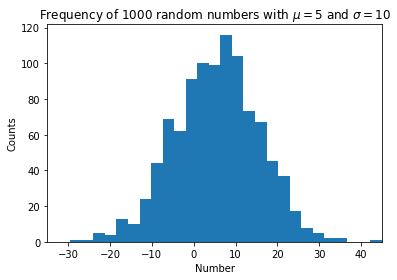

In [ ]:
normVector = np.random.normal(5,10,1000)
bins = np.linspace(-35, 45, 30)
plt.hist(normVector, bins=bins)
plt.title(r"Frequency of 1000 random numbers with $\mu = 5$ and $\sigma = 10$")
plt.xlabel("Number")
plt.ylabel("Counts")
plt.xlim([-35, 45])

## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph.
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  You can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to draw the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. 

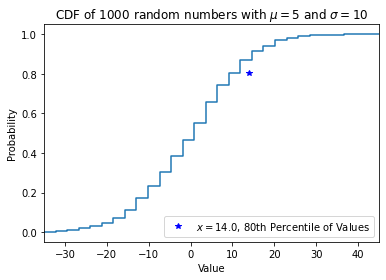

In [ ]:
counts = np.histogram(normVector, bins=30)[0]
cdf = np.cumsum(counts/1000)

plt.plot(bins, cdf, ds='steps')
plt.title(r"CDF of 1000 random numbers with $\mu = 5$ and $\sigma = 10$")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.xlim([-35, 45])

percentile = np.percentile(normVector, 80)
point, = plt.plot(percentile, cdf[np.argmax(cdf > 0.8)], 'b*')
point.set_label('$x = $' + str(percentile)[:4] + ', 80th Percentile of Values')
plt.legend(loc=4)

## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `by`. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

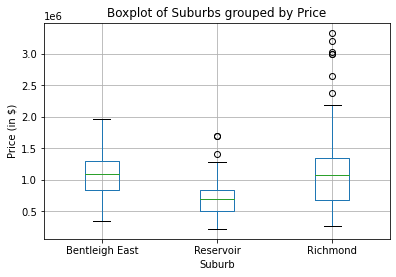

In [ ]:
reservoir = df[df["Suburb"] == ("Reservoir")]
richmond = df[df["Suburb"] == "Richmond"]
bentleigh = df[df["Suburb"] == "Bentleigh East"]
df2 = pd.concat([reservoir, richmond, bentleigh])
df2.boxplot("Price", by="Suburb")
plt.title("Boxplot of Suburbs grouped by Price")
plt.ylabel("Price (in $)")
plt.suptitle('')

## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

Text(0, 0.5, 'y')

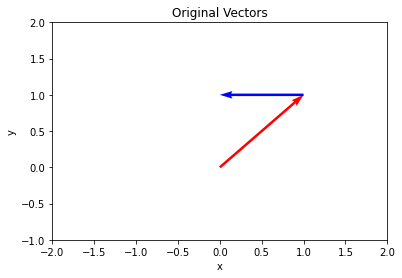

In [ ]:
# Origin points
a_i = [0, 0]
b_i = [1, 1]

# Displacements
V = np.array([[1, -1], [1, 0]])

plt.quiver(*a_i, *np.resize(V[:,0], (2, 1)), color='r', angles='xy', scale_units='xy', scale=1)
plt.quiver(*b_i, *np.resize(V[:,1], (2, 1)), color='b', angles='xy', scale_units='xy', scale=1)
plt.xlim([-2, 2])
plt.ylim([-1, 2])
plt.title('Original Vectors')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

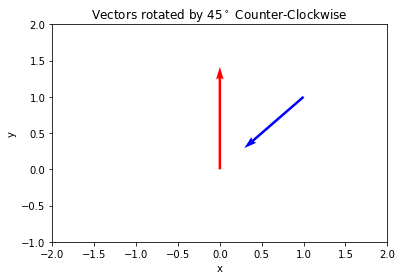

In [ ]:
# Rotation matrix for 45 degrees counter-clockwise
rot = np.array([[np.cos(np.pi / 4), -np.sin(np.pi / 4)],
                [np.sin(np.pi / 4), np.cos(np.pi / 4)]])

# Apply rotation to the displacements
V = np.matmul(rot, V)

plt.quiver(*a_i, *np.resize(V[:,0], (2, 1)), color='r', angles='xy', scale_units='xy', scale=1)
plt.quiver(*b_i, *np.resize(V[:,1], (2, 1)), color='b', angles='xy', scale_units='xy', scale=1)
plt.xlim([-2, 2])
plt.ylim([-1, 2])
plt.title('Vectors rotated by 45${}^\circ$ Counter-Clockwise')
plt.xlabel('x')
plt.ylabel('y')

## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [ ]:
A = np.array([[2, 1, 1], [4, -6, 0], [-2, 7, 2]])
b = np.array([[5], [-2], [9]])
np.matmul(np.linalg.inv(A), b)

array([[1.],
       [1.],
       [2.]])

In [ ]:
a = np.array([[2,1,1], [4,-6,0], [-2,7,2]])
b = np.array([5,-2,9])
x = np.matmul(np.linalg.inv(a),b)
print(f"x = {x[0]:.0f}\ny = {x[1]:.0f}\nz = {x[2]:.0f}")

x = 1
y = 1
z = 2
